In [52]:
import numpy as np
def load_dataset(file_path):
	dataset = np.load(file_path)
	Xtr_val = dataset['Xtr'][:10000]
	Xtr_val = Xtr_val.reshape(Xtr_val.shape[0], -1)
	Str_val = dataset['Str'][:10000]
	Xts = dataset['Xts']
	Xts=  Xts.reshape(Xts.shape[0], -1)
	Yts = dataset['Yts']
	print(Xtr_val.shape)
	print(Str_val.shape)
	print(Xts.shape)
	print(Yts.shape)
	return Xtr_val,Str_val,Xts,Yts

In [53]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def calculate_metrics(noisy_label, predict_label):
    accuracy = accuracy_score(noisy_label, predict_label)
    recall = recall_score(noisy_label, predict_label, average='macro')
    precision = precision_score(noisy_label, predict_label, average='macro')
    f1 = f1_score(noisy_label, predict_label, average='macro')
    return accuracy, recall, precision, f1

In [54]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
def PCA_n(X_scaled):#principal component analysis (PCA)
	estimator_pca = PCA(n_components=None)
	estimator_pca.fit(X_scaled)
	evr = estimator_pca.explained_variance_ratio_ 
	plt.figure(figsize=(8, 5))
	plt.plot(np.arange(1, len(evr) + 1), np.cumsum(evr*100), "-o")
	plt.title("Cumulative Explained Variance Ratio", fontsize=15)
	plt.xlabel("number of components",fontsize=15)
	plt.ylabel("explained variance ratio(%)",fontsize=15)
	plt.xticks(fontsize=12)
	plt.yticks(fontsize=12)
	plt.show()

def pcaX(X_scaled,n):#Data downgrading
	pca = PCA(n_components=n)
	pca_X = pca.fit_transform(X_scaled)
	print('PCA：',X_scaled.shape,'-->',pca_X.shape)
	return pca,pca_X

## Emsemble Learning

In [55]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def train_and_evaluate(Xtr_val, Str_val,Xts,Yts, transition_matrix, num_trainings=10):
    recall_train_scores = []
    precision_train_scores = []
    f1_train_scores = []
    accuracy_train_scores = []

    recall_valid_scores = []
    precision_valid_scores = []
    f1_valid_scores = []
    accuracy_valid_scores = []

    models = []

    for i in range(num_trainings):
        X_train, X_valid, y_train, y_valid = train_test_split(Xtr_val, Str_val, test_size=0.2, random_state=None)

        rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=10)
        rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
        models.append(rf_model)

        y_train_pred = rf_model.predict_proba(X_train.reshape(X_train.shape[0], -1))
        y_valid_pred = rf_model.predict_proba(X_valid.reshape(X_valid.shape[0], -1))

        adjusted_train_predictions = np.dot(y_train_pred, transition_matrix)
        adjusted_train_class_predictions = np.argmax(adjusted_train_predictions, axis=1)

        accuracy_train = accuracy_score(y_train, adjusted_train_class_predictions)
        recall_train = recall_score(y_train, adjusted_train_class_predictions, average='macro')
        precision_train = precision_score(y_train, adjusted_train_class_predictions, average='macro')
        f1_train = f1_score(y_train, adjusted_train_class_predictions, average='macro')

        recall_train_scores.append(recall_train)
        precision_train_scores.append(precision_train)
        f1_train_scores.append(f1_train)
        accuracy_train_scores.append(accuracy_train)

        adjusted_valid_predictions = np.dot(y_valid_pred, transition_matrix)
        adjusted_valid_class_predictions = np.argmax(adjusted_valid_predictions, axis=1)

        accuracy_valid = accuracy_score(y_valid, adjusted_valid_class_predictions)
        recall_valid = recall_score(y_valid, adjusted_valid_class_predictions, average='macro')
        precision_valid = precision_score(y_valid, adjusted_valid_class_predictions, average='macro')
        f1_valid = f1_score(y_valid, adjusted_valid_class_predictions, average='macro')

        recall_valid_scores.append(recall_valid)
        precision_valid_scores.append(precision_valid)
        f1_valid_scores.append(f1_valid)
        accuracy_valid_scores.append(accuracy_valid)

        print(f"Training {i+1} - Recall (Train): {recall_train:.2f}, Precision (Train): {precision_train:.2f}, F1 (Train): {f1_train:.2f}, Accuracy (Train): {accuracy_train:.2f}")
        print(f"Training {i+1} - Recall (Valid): {recall_valid:.2f}, Precision (Valid): {precision_valid:.2f}, F1 (Valid): {f1_valid:.2f}, Accuracy (Valid): {accuracy_valid:.2f}")

    mean_recall_train = np.mean(recall_train_scores)
    std_recall_train = np.std(recall_train_scores)
    mean_precision_train = np.mean(precision_train_scores)
    std_precision_train = np.std(precision_train_scores)
    mean_f1_train = np.mean(f1_train_scores)
    std_f1_train = np.std(f1_train_scores)
    mean_accuracy_train = np.mean(accuracy_train_scores)
    std_accuracy_train = np.std(accuracy_train_scores)

    mean_recall_valid = np.mean(recall_valid_scores)
    std_recall_valid = np.std(recall_valid_scores)
    mean_precision_valid = np.mean(precision_valid_scores)
    std_precision_valid = np.std(precision_valid_scores)
    mean_f1_valid = np.mean(f1_valid_scores)
    std_f1_valid = np.std(f1_valid_scores)
    mean_accuracy_valid = np.mean(accuracy_valid_scores)
    std_accuracy_valid = np.std(accuracy_valid_scores)

    print(f"\nMean Recall (Train): {mean_recall_train:.2f} ± {std_recall_train:.2f}")
    print(f"Mean Precision (Train): {mean_precision_train:.2f} ± {std_precision_train:.2f}")
    print(f"Mean F1 (Train): {mean_f1_train:.2f} ± {std_f1_train:.2f}")
    print(f"Mean Accuracy (Train): {mean_accuracy_train:.2f} ± {std_accuracy_train:.2f}")

    print(f"\nMean Recall (Valid): {mean_recall_valid:.2f} ± {std_recall_valid:.2f}")
    print(f"Mean Precision (Valid): {mean_precision_valid:.2f} ± {std_precision_valid:.2f}")
    print(f"Mean F1 (Valid): {mean_f1_valid:.2f} ± {std_f1_valid:.2f}")
    print(f"Mean Accuracy (Valid): {mean_accuracy_valid:.2f} ± {std_accuracy_valid:.2f}")


    # test
    y_test_pred = rf_model.predict_proba(Xts.reshape(Xts.shape[0], -1))

    adjusted_test_predictions = np.dot(y_test_pred, transition_matrix)
    adjusted_test_predictions = np.argmax(adjusted_test_predictions, axis=1)

    accuracy = accuracy_score(Yts, adjusted_test_predictions)
    recall = recall_score(Yts, adjusted_test_predictions, average='macro')
    precision = precision_score(Yts, adjusted_test_predictions, average='macro')
    f1 = f1_score(Yts, adjusted_test_predictions, average='macro')
    print("Test:", f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Top 1 Accuracy: {accuracy:.4f}')


## Estimate transition matrix - CIFAR

(10000, 3072)
(10000,)
(3000, 3072)
(3000,)


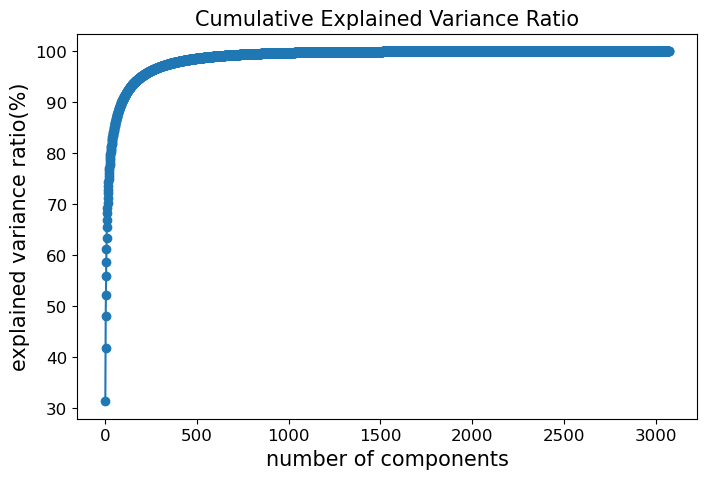

PCA： (10000, 3072) --> (10000, 90)


In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

file_path = './datasets/CIFAR.npz'
Xtr_val,Str_val,Xts,Yts = load_dataset(file_path)
PCA_n(Xtr_val)
pca,Xtr_val = pcaX(Xtr_val,0.9)	
Xts = pca.transform(Xts)

# Training a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(Xtr_val, Str_val)

# Predictions on the test set
y_pred = clf.predict(Xts)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Yts, y_pred)

In [57]:
# Calculate Flip Rates
flip_rates = conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)

# Calculate Negative and Positive Flip Rates
neg_flip_rates = 1 - np.diag(flip_rates)
pos_flip_rates = 1 - np.diag(flip_rates.T)

# Calculate the transfer matrix
transition_matrix = np.eye(len(flip_rates)) - np.diag(neg_flip_rates)

for i in range(len(flip_rates)):
    for j in range(len(flip_rates)):
        if i != j:
            transition_matrix[i, j] = pos_flip_rates[j]
            
print("Transition Matrix:")
print(transition_matrix)
Trans_matrix_CIFAR = transition_matrix

Negative Flip Rates: [0.531 0.609 0.687]
Positive Flip Rates: [0.531 0.609 0.687]
Transition Matrix:
[[0.469 0.609 0.687]
 [0.531 0.391 0.687]
 [0.531 0.609 0.313]]


### FashionMNIST0.5.npz

(10000, 784)
(10000,)
(3000, 784)
(3000,)


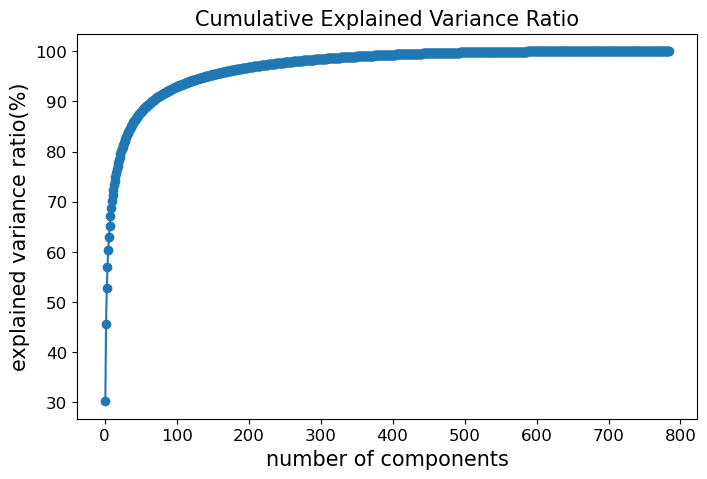

PCA： (10000, 784) --> (10000, 141)
Training 1 - Recall (Train): 0.97, Precision (Train): 0.97, F1 (Train): 0.97, Accuracy (Train): 0.97
Training 1 - Recall (Valid): 0.38, Precision (Valid): 0.38, F1 (Valid): 0.38, Accuracy (Valid): 0.38
Training 2 - Recall (Train): 0.97, Precision (Train): 0.97, F1 (Train): 0.97, Accuracy (Train): 0.97
Training 2 - Recall (Valid): 0.39, Precision (Valid): 0.39, F1 (Valid): 0.39, Accuracy (Valid): 0.39
Training 3 - Recall (Train): 0.97, Precision (Train): 0.97, F1 (Train): 0.97, Accuracy (Train): 0.97
Training 3 - Recall (Valid): 0.40, Precision (Valid): 0.40, F1 (Valid): 0.40, Accuracy (Valid): 0.40
Training 4 - Recall (Train): 0.97, Precision (Train): 0.97, F1 (Train): 0.97, Accuracy (Train): 0.97
Training 4 - Recall (Valid): 0.39, Precision (Valid): 0.39, F1 (Valid): 0.39, Accuracy (Valid): 0.39
Training 5 - Recall (Train): 0.97, Precision (Train): 0.97, F1 (Train): 0.97, Accuracy (Train): 0.97
Training 5 - Recall (Valid): 0.39, Precision (Valid): 0.

In [58]:
file_path = './datasets/FashionMNIST0.5.npz'
Xtr_val,Str_val,Xts,Yts = load_dataset(file_path)
Trans_matrix = np.array([[0.5,0.2,0.3],[0.3,0.5,0.2],[0.2,0.3,0.5]])
PCA_n(Xtr_val)
pca,Xtr_val = pcaX(Xtr_val,0.95)	
Xts = pca.transform(Xts)
trained_models = train_and_evaluate(Xtr_val, Str_val,Xts,Yts, Trans_matrix)

### FashionMNIST0.6.npz

(10000, 784)
(10000,)
(3000, 784)
(3000,)


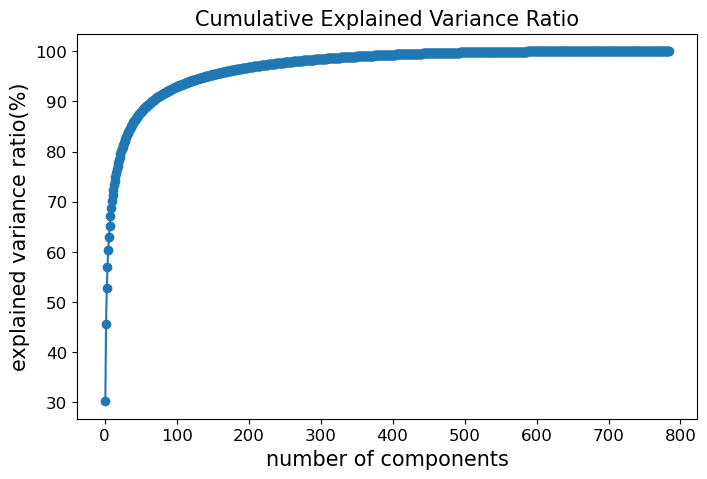

PCA： (10000, 784) --> (10000, 141)
Training 1 - Recall (Train): 0.99, Precision (Train): 0.99, F1 (Train): 0.99, Accuracy (Train): 0.99
Training 1 - Recall (Valid): 0.34, Precision (Valid): 0.34, F1 (Valid): 0.34, Accuracy (Valid): 0.35
Training 2 - Recall (Train): 0.99, Precision (Train): 0.99, F1 (Train): 0.99, Accuracy (Train): 0.99
Training 2 - Recall (Valid): 0.34, Precision (Valid): 0.34, F1 (Valid): 0.33, Accuracy (Valid): 0.34
Training 3 - Recall (Train): 0.99, Precision (Train): 0.99, F1 (Train): 0.99, Accuracy (Train): 0.99
Training 3 - Recall (Valid): 0.34, Precision (Valid): 0.34, F1 (Valid): 0.34, Accuracy (Valid): 0.34
Training 4 - Recall (Train): 0.99, Precision (Train): 0.99, F1 (Train): 0.99, Accuracy (Train): 0.99
Training 4 - Recall (Valid): 0.35, Precision (Valid): 0.35, F1 (Valid): 0.35, Accuracy (Valid): 0.35
Training 5 - Recall (Train): 0.99, Precision (Train): 0.99, F1 (Train): 0.99, Accuracy (Train): 0.99
Training 5 - Recall (Valid): 0.34, Precision (Valid): 0.

In [59]:
file_path = './datasets/FashionMNIST0.6.npz'
Xtr_val,Str_val,Xts,Yts = load_dataset(file_path)
Trans_matrix = np.array([[0.4,0.3,0.3],[0.3,0.4,0.3],[0.3,0.3,0.4]])
PCA_n(Xtr_val)
pca,Xtr_val = pcaX(Xtr_val,0.95)	
Xts = pca.transform(Xts)
trained_models = train_and_evaluate(Xtr_val, Str_val,Xts,Yts, Trans_matrix)

### CIFAR.npz

(10000, 3072)
(10000,)
(3000, 3072)
(3000,)


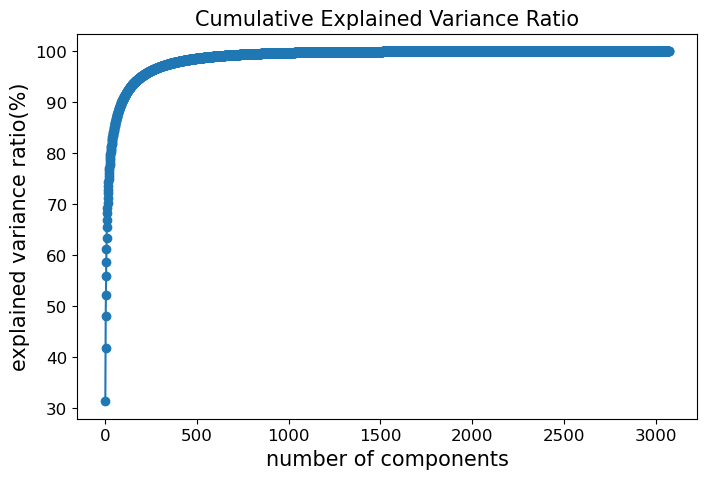

PCA： (10000, 3072) --> (10000, 195)
Training 1 - Recall (Train): 0.00, Precision (Train): 0.00, F1 (Train): 0.00, Accuracy (Train): 0.00
Training 1 - Recall (Valid): 0.33, Precision (Valid): 0.31, F1 (Valid): 0.28, Accuracy (Valid): 0.33
Training 2 - Recall (Train): 0.00, Precision (Train): 0.00, F1 (Train): 0.00, Accuracy (Train): 0.01
Training 2 - Recall (Valid): 0.33, Precision (Valid): 0.36, F1 (Valid): 0.28, Accuracy (Valid): 0.33
Training 3 - Recall (Train): 0.00, Precision (Train): 0.00, F1 (Train): 0.00, Accuracy (Train): 0.00
Training 3 - Recall (Valid): 0.33, Precision (Valid): 0.34, F1 (Valid): 0.28, Accuracy (Valid): 0.33
Training 4 - Recall (Train): 0.00, Precision (Train): 0.00, F1 (Train): 0.00, Accuracy (Train): 0.00
Training 4 - Recall (Valid): 0.35, Precision (Valid): 0.35, F1 (Valid): 0.29, Accuracy (Valid): 0.35
Training 5 - Recall (Train): 0.00, Precision (Train): 0.00, F1 (Train): 0.00, Accuracy (Train): 0.00
Training 5 - Recall (Valid): 0.34, Precision (Valid): 0

In [60]:
file_path = './datasets/CIFAR.npz'
Xtr_val,Str_val,Xts,Yts = load_dataset(file_path)
Trans_matrix = Trans_matrix_CIFAR
PCA_n(Xtr_val)
pca,Xtr_val = pcaX(Xtr_val,0.95)	
Xts = pca.transform(Xts)
trained_models = train_and_evaluate(Xtr_val, Str_val,Xts,Yts, Trans_matrix)

## Forward

In [61]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, random_split

In [62]:
def load_data_mnist(path):
  dataset = np.load(path)
  Xtr = torch.from_numpy(dataset['Xtr'].astype(np.float32)/255).unsqueeze(1)
  Str = torch.from_numpy(dataset['Str'])
  Xts = torch.from_numpy(dataset['Xts'].astype(np.float32)/255).unsqueeze(1)
  Yts = torch.from_numpy(dataset['Yts'])
  return Xtr, Str, Xts, Yts

def load_data_cifar(path):
  dataset = np.load(path)
  Xtr = torch.from_numpy(dataset['Xtr'].astype(np.float32)/255)
  Str = torch.from_numpy(dataset['Str'])
  Xts = torch.from_numpy(dataset['Xts'].astype(np.float32)/255)
  Yts = torch.from_numpy(dataset['Yts'])
  return Xtr, Str, Xts, Yts

def split_dataset(Xtr,Str,valid_rate = 0.2):
  combine_data = TensorDataset(Xtr,Str)
  train_data, valid_data = random_split(combine_data,[int(len(combine_data)*(1-valid_rate)),int(len(combine_data)*valid_rate)])
  return train_data, valid_data

### Forward Method - CNN

In [63]:
import torch.nn as nn
class CNNModel_1(nn.Module):
    def __init__(self, num_classes=3):
        super(CNNModel_1, self).__init__()
        
        # Adjust the input channel to 1
        self.conv1 = nn.Conv2d(1, 64, kernel_size=4, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        
        # Layer 1
        self.layer1 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn_layer1 = nn.BatchNorm2d(64)
        self.relu_layer1 = nn.ReLU(inplace=True)
        self.pool_layer1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 2
        self.layer2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn_layer2 = nn.BatchNorm2d(128)
        self.relu_layer2 = nn.ReLU(inplace=True)
        self.pool_layer2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 3
        self.layer3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn_layer3 = nn.BatchNorm2d(256)
        self.relu_layer3 = nn.ReLU(inplace=True)
        self.pool_layer3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 4
        self.layer4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn_layer4 = nn.BatchNorm2d(512)
        self.relu_layer4 = nn.ReLU(inplace=True)
        self.pool_layer4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layer
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.layer1(x)
        x = self.bn_layer1(x)
        x = self.relu_layer1(x)
        x = self.pool_layer1(x)
        x = self.layer2(x)
        x = self.bn_layer2(x)
        x = self.relu_layer2(x)
        x = self.pool_layer2(x)
        x = self.layer3(x)
        x = self.bn_layer3(x)
        x = self.relu_layer3(x)
        x = self.pool_layer3(x)
        x = self.layer4(x)
        x = self.bn_layer4(x)
        x = self.relu_layer4(x)
        x = self.pool_layer4(x)
        
        # Global Average Pooling
        x = x.mean([2, 3])
        
        # Fully Connected Layer
        x = self.fc(x)
        
        return x
    
import torch.nn as nn

class CNNModel_2(nn.Module):
    def __init__(self, num_classes=3):
        super(CNNModel_2, self).__init__()
        
        # Adjust the input channels to 3
        self.conv1 = nn.Conv2d(3, 64, kernel_size=4, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        
        # Layer 1
        self.layer1 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn_layer1 = nn.BatchNorm2d(64)
        self.relu_layer1 = nn.ReLU(inplace=True)
        self.pool_layer1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 2
        self.layer2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn_layer2 = nn.BatchNorm2d(128)
        self.relu_layer2 = nn.ReLU(inplace=True)
        self.pool_layer2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 3
        self.layer3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn_layer3 = nn.BatchNorm2d(256)
        self.relu_layer3 = nn.ReLU(inplace=True)
        self.pool_layer3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 4
        self.layer4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn_layer4 = nn.BatchNorm2d(512)
        self.relu_layer4 = nn.ReLU(inplace=True)
        self.pool_layer4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layer
        self.fc = nn.Linear(512, num_classes)
    def forward(self, x):
        # Swap dimensions to [batch_size, 3, 32, 32]
        x = x.permute(0, 3, 1, 2)
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.layer1(x)
        x = self.bn_layer1(x)
        x = self.relu_layer1(x)
        x = self.pool_layer1(x)
        x = self.layer2(x)
        x = self.bn_layer2(x)
        x = self.relu_layer2(x)
        x = self.pool_layer2(x)
        x = self.layer3(x)
        x = self.bn_layer3(x)
        x = self.relu_layer3(x)
        x = self.pool_layer3(x)
        x = self.layer4(x)
        x = self.bn_layer4(x)
        x = self.relu_layer4(x)
        x = self.pool_layer4(x)
        
        # Global Average Pooling
        x = x.mean([2, 3])
        
        # Fully Connected Layer
        x = self.fc(x)
        
        return x

In [64]:
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch

def train_model(model, optimizer, loss_function, Xtr, Str,Xts,Yts, Trans_matrix, epochs=10, batch_size=64):
    cuda_available = torch.cuda.is_available()
    if cuda_available:
        model = model.cuda()

    if cuda_available:
        Trans_matrix = Trans_matrix.cuda()

    train_data, valid_data = split_dataset(Xtr, Str)

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)

    train_metrics = {
        'loss': [],
        'accuracy': [],
        'recall': [],
        'precision': [],
        'f1': [],
    }

    valid_metrics = {
        'loss': [],
        'accuracy': [],
        'recall': [],
        'precision': [],
        'f1': [],
    }

    for epoch in range(epochs):
        noisy_label = []
        predict_label = []

        model.train()

        for Xtr_batch, Str_batch in train_loader:
            if cuda_available:
                Xtr_batch = Xtr_batch.cuda()
                Str_batch = Str_batch.cuda()
            outputs = model(Xtr_batch)
            trans_outputs = torch.mm(outputs, Trans_matrix)
            _, predict = torch.max(trans_outputs, 1)
            noisy_label.extend(Str_batch.view(-1).tolist())
            predict_label.extend(predict.view(-1).tolist())
            loss = loss_function(trans_outputs, Str_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        accuracy, recall, precision, f1 = calculate_metrics(noisy_label, predict_label)
        train_metrics['loss'].append(loss.item())
        train_metrics['accuracy'].append(accuracy)
        train_metrics['recall'].append(recall)
        train_metrics['precision'].append(precision)
        train_metrics['f1'].append(f1)

        print(f'Epoch [{epoch + 1}/{epochs}] - Train, Loss: {loss.item():.4f} | '
              f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Top 1 Accuracy: {accuracy:.4f}')

        valid_loss = 0
        model.eval()
        noisy_valid_label = []
        predict_valid_label = []

        with torch.no_grad():
            for Xtr_valid_batch, Str_valid_batch in valid_loader:
                if cuda_available:
                    Xtr_valid_batch = Xtr_valid_batch.cuda()
                    Str_valid_batch = Str_valid_batch.cuda()

                outputs_valid = model(Xtr_valid_batch)
                loss_function_valid = loss_function(outputs_valid, Str_valid_batch)
                valid_loss += loss_function_valid.item()

                _, val_predict = torch.max(outputs_valid, 1)
                noisy_valid_label.extend(Str_valid_batch.view(-1).tolist())
                predict_valid_label.extend(val_predict.view(-1).tolist())

        accuracy, recall, precision, f1 = calculate_metrics(noisy_valid_label, predict_valid_label)
        valid_metrics['loss'].append(loss.item())
        valid_metrics['accuracy'].append(accuracy)
        valid_metrics['recall'].append(recall)
        valid_metrics['precision'].append(precision)
        valid_metrics['f1'].append(f1)

        print(f'Epoch [{epoch + 1}/{epochs}] - Valid, Loss: {loss.item():.4f} | '
              f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Top 1 Accuracy: {accuracy:.4f}')

    # Calculate and print mean and std for training metrics
    mean_train_loss = np.mean(train_metrics['loss'])
    std_train_loss = np.std(train_metrics['loss'])
    mean_train_accuracy = np.mean(train_metrics['accuracy'])
    std_train_accuracy = np.std(train_metrics['accuracy'])
    mean_train_recall = np.mean(train_metrics['recall'])
    std_train_recall = np.std(train_metrics['recall'])
    mean_train_precision = np.mean(train_metrics['precision'])
    std_train_precision = np.std(train_metrics['precision'])
    mean_train_f1 = np.mean(train_metrics['f1'])
    std_train_f1 = np.std(train_metrics['f1'])

    print(f"\nMean Training Loss: {mean_train_loss:.4f} ± {std_train_loss:.4f}")
    print(f"Mean Training Accuracy: {mean_train_accuracy:.4f} ± {std_train_accuracy:.4f}")
    print(f"Mean Training Recall: {mean_train_recall:.4f} ± {std_train_recall:.4f}")
    print(f"Mean Training Precision: {mean_train_precision:.4f} ± {std_train_precision:.4f}")
    print(f"Mean Training F1 Score: {mean_train_f1:.4f} ± {std_train_f1:.4f}")

    # Calculate and print mean and std for validation metrics
    mean_valid_loss = np.mean(valid_metrics['loss'])
    std_valid_loss = np.std(valid_metrics['loss'])
    mean_valid_accuracy = np.mean(valid_metrics['accuracy'])
    std_valid_accuracy = np.std(valid_metrics['accuracy'])
    mean_valid_recall = np.mean(valid_metrics['recall'])
    std_valid_recall = np.std(valid_metrics['recall'])
    mean_valid_precision = np.mean(valid_metrics['precision'])
    std_valid_precision = np.std(valid_metrics['precision'])
    mean_valid_f1 = np.mean(valid_metrics['f1'])
    std_valid_f1 = np.std(valid_metrics['f1'])

    print(f"\nMean Validation Loss: {mean_valid_loss:.4f} ± {std_valid_loss:.4f}")
    print(f"Mean Validation Accuracy: {mean_valid_accuracy:.4f} ± {std_valid_accuracy:.4f}")
    print(f"Mean Validation Recall: {mean_valid_recall:.4f} ± {std_valid_recall:.4f}")
    print(f"Mean Validation Precision: {mean_valid_precision:.4f} ± {std_valid_precision:.4f}")
    print(f"Mean Validation F1 Score: {mean_valid_f1:.4f} ± {std_valid_f1:.4f}")

    model.eval()
    outputs = model(Xts)
    trans_outputs = torch.mm(outputs, Trans_matrix)
    _, predict = torch.max(trans_outputs, 1)
    accuracy, recall, precision, f1 = calculate_metrics(Yts, predict)
    print(f'TestSet Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Top 1 Accuracy: {accuracy:.4f}')

### FashionMNIST0.5.npz

In [65]:
model = CNNModel_1(num_classes=3)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
Xtr, Str, Xts, Yts = load_data_mnist('./datasets/FashionMNIST0.5.npz')
Trans_matrix = torch.tensor([[0.5, 0.2, 0.3], [0.3, 0.5, 0.2], [0.2, 0.3, 0.5]])

train_model(model, optimizer, loss_function, Xtr, Str,Xts,Yts, Trans_matrix)

Epoch [1/10] - Train, Loss: 1.0408 | Precision: 0.4556, Recall: 0.4546, F1 Score: 0.4536, Top 1 Accuracy: 0.4544
Epoch [1/10] - Valid, Loss: 1.0408 | Precision: 0.4699, Recall: 0.4696, F1 Score: 0.4644, Top 1 Accuracy: 0.4689
Epoch [2/10] - Train, Loss: 1.0667 | Precision: 0.4748, Recall: 0.4738, F1 Score: 0.4735, Top 1 Accuracy: 0.4737
Epoch [2/10] - Valid, Loss: 1.0667 | Precision: 0.4707, Recall: 0.4704, F1 Score: 0.4688, Top 1 Accuracy: 0.4711
Epoch [3/10] - Train, Loss: 0.9513 | Precision: 0.4819, Recall: 0.4813, F1 Score: 0.4811, Top 1 Accuracy: 0.4813
Epoch [3/10] - Valid, Loss: 0.9513 | Precision: 0.4419, Recall: 0.4312, F1 Score: 0.4218, Top 1 Accuracy: 0.4317
Epoch [4/10] - Train, Loss: 1.0140 | Precision: 0.4826, Recall: 0.4820, F1 Score: 0.4819, Top 1 Accuracy: 0.4820
Epoch [4/10] - Valid, Loss: 1.0140 | Precision: 0.4156, Recall: 0.4056, F1 Score: 0.3458, Top 1 Accuracy: 0.4133
Epoch [5/10] - Train, Loss: 1.0590 | Precision: 0.4831, Recall: 0.4829, F1 Score: 0.4828, Top 1 

### FashionMNIST0.6.npz

In [66]:
model = CNNModel_1(num_classes=3)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
Xtr, Str, Xts, Yts =  load_data_mnist('./datasets/FashionMNIST0.6.npz')
Trans_matrix = torch.tensor([[0.4,0.3,0.3],[0.3,0.4,0.3],[0.3,0.3,0.4]])
train_model(model, optimizer, loss_function, Xtr, Str,Xts,Yts, Trans_matrix)

Epoch [1/10] - Train, Loss: 1.1036 | Precision: 0.3748, Recall: 0.3742, F1 Score: 0.3737, Top 1 Accuracy: 0.3743
Epoch [1/10] - Valid, Loss: 1.1036 | Precision: 0.3679, Recall: 0.3680, F1 Score: 0.3662, Top 1 Accuracy: 0.3689
Epoch [2/10] - Train, Loss: 1.1032 | Precision: 0.3928, Recall: 0.3921, F1 Score: 0.3913, Top 1 Accuracy: 0.3922
Epoch [2/10] - Valid, Loss: 1.1032 | Precision: 0.3800, Recall: 0.3759, F1 Score: 0.3709, Top 1 Accuracy: 0.3750
Epoch [3/10] - Train, Loss: 1.0954 | Precision: 0.3953, Recall: 0.3938, F1 Score: 0.3928, Top 1 Accuracy: 0.3940
Epoch [3/10] - Valid, Loss: 1.0954 | Precision: 0.3782, Recall: 0.3757, F1 Score: 0.3715, Top 1 Accuracy: 0.3758
Epoch [4/10] - Train, Loss: 1.0651 | Precision: 0.3993, Recall: 0.3986, F1 Score: 0.3978, Top 1 Accuracy: 0.3987
Epoch [4/10] - Valid, Loss: 1.0651 | Precision: 0.3794, Recall: 0.3777, F1 Score: 0.3772, Top 1 Accuracy: 0.3772
Epoch [5/10] - Train, Loss: 1.0551 | Precision: 0.3980, Recall: 0.3972, F1 Score: 0.3963, Top 1 

## CIFAR.npz

In [67]:
model = CNNModel_2(num_classes=3)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
Xtr, Str, Xts, Yts = load_data_cifar('./datasets/CIFAR.npz')
Trans_matrix = torch.from_numpy(Trans_matrix_CIFAR).float()
train_model(model, optimizer, loss_function, Xtr, Str,Xts,Yts, Trans_matrix)

Epoch [1/10] - Train, Loss: 1.0659 | Precision: 0.3594, Recall: 0.3593, F1 Score: 0.3590, Top 1 Accuracy: 0.3593
Epoch [1/10] - Valid, Loss: 1.0659 | Precision: 0.2805, Recall: 0.2808, F1 Score: 0.2803, Top 1 Accuracy: 0.2810
Epoch [2/10] - Train, Loss: 1.0712 | Precision: 0.3743, Recall: 0.3742, F1 Score: 0.3737, Top 1 Accuracy: 0.3742
Epoch [2/10] - Valid, Loss: 1.0712 | Precision: 0.2753, Recall: 0.2805, F1 Score: 0.2718, Top 1 Accuracy: 0.2803
Epoch [3/10] - Train, Loss: 1.0851 | Precision: 0.3804, Recall: 0.3802, F1 Score: 0.3798, Top 1 Accuracy: 0.3802
Epoch [3/10] - Valid, Loss: 1.0851 | Precision: 0.2947, Recall: 0.2995, F1 Score: 0.2780, Top 1 Accuracy: 0.2990
Epoch [4/10] - Train, Loss: 1.1199 | Precision: 0.3871, Recall: 0.3875, F1 Score: 0.3867, Top 1 Accuracy: 0.3874
Epoch [4/10] - Valid, Loss: 1.1199 | Precision: 0.2767, Recall: 0.2778, F1 Score: 0.2761, Top 1 Accuracy: 0.2780
Epoch [5/10] - Train, Loss: 1.0526 | Precision: 0.3959, Recall: 0.3959, F1 Score: 0.3955, Top 1 

## Comparison

In [68]:
model = CNNModel_2(num_classes=3)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
Xtr, Str, Xts, Yts = load_data_cifar('./datasets/CIFAR.npz')
Trans_matrix = torch.tensor([[0.5, 0.2, 0.3], [0.3, 0.5, 0.2], [0.2, 0.3, 0.5]])
train_model(model, optimizer, loss_function, Xtr, Str,Xts,Yts, Trans_matrix)

Epoch [1/10] - Train, Loss: 1.1296 | Precision: 0.3636, Recall: 0.3636, F1 Score: 0.3595, Top 1 Accuracy: 0.3648
Epoch [1/10] - Valid, Loss: 1.1296 | Precision: 0.3497, Recall: 0.3422, F1 Score: 0.3113, Top 1 Accuracy: 0.3327
Epoch [2/10] - Train, Loss: 1.0348 | Precision: 0.3721, Recall: 0.3721, F1 Score: 0.3704, Top 1 Accuracy: 0.3729
Epoch [2/10] - Valid, Loss: 1.0348 | Precision: 0.3769, Recall: 0.3579, F1 Score: 0.3088, Top 1 Accuracy: 0.3497
Epoch [3/10] - Train, Loss: 1.0809 | Precision: 0.3803, Recall: 0.3810, F1 Score: 0.3780, Top 1 Accuracy: 0.3820
Epoch [3/10] - Valid, Loss: 1.0809 | Precision: 0.3753, Recall: 0.3699, F1 Score: 0.3534, Top 1 Accuracy: 0.3777
Epoch [4/10] - Train, Loss: 1.0783 | Precision: 0.3881, Recall: 0.3881, F1 Score: 0.3862, Top 1 Accuracy: 0.3888
Epoch [4/10] - Valid, Loss: 1.0783 | Precision: 0.3707, Recall: 0.3639, F1 Score: 0.3024, Top 1 Accuracy: 0.3523
Epoch [5/10] - Train, Loss: 1.0861 | Precision: 0.3939, Recall: 0.3934, F1 Score: 0.3918, Top 1 

(10000, 3072)
(10000,)
(3000, 3072)
(3000,)


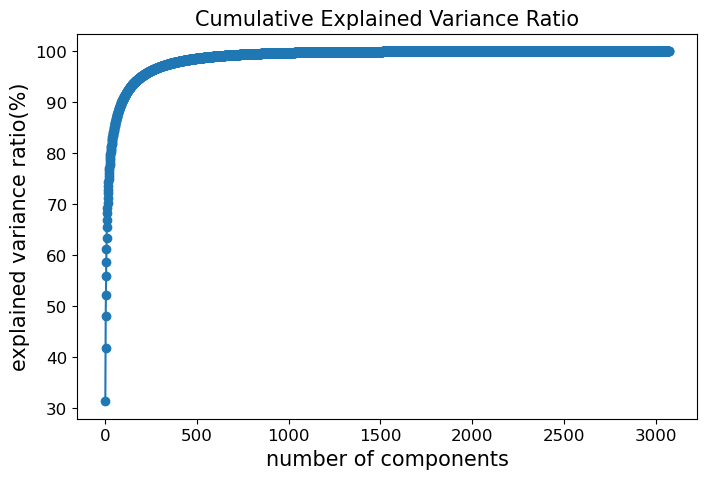

PCA： (10000, 3072) --> (10000, 195)
Training 1 - Recall (Train): 0.97, Precision (Train): 0.97, F1 (Train): 0.97, Accuracy (Train): 0.97
Training 1 - Recall (Valid): 0.33, Precision (Valid): 0.33, F1 (Valid): 0.33, Accuracy (Valid): 0.33
Training 2 - Recall (Train): 0.97, Precision (Train): 0.97, F1 (Train): 0.97, Accuracy (Train): 0.97
Training 2 - Recall (Valid): 0.33, Precision (Valid): 0.33, F1 (Valid): 0.33, Accuracy (Valid): 0.33
Training 3 - Recall (Train): 0.97, Precision (Train): 0.97, F1 (Train): 0.97, Accuracy (Train): 0.97
Training 3 - Recall (Valid): 0.33, Precision (Valid): 0.33, F1 (Valid): 0.33, Accuracy (Valid): 0.33
Training 4 - Recall (Train): 0.98, Precision (Train): 0.98, F1 (Train): 0.98, Accuracy (Train): 0.98
Training 4 - Recall (Valid): 0.35, Precision (Valid): 0.35, F1 (Valid): 0.35, Accuracy (Valid): 0.35
Training 5 - Recall (Train): 0.98, Precision (Train): 0.98, F1 (Train): 0.98, Accuracy (Train): 0.98
Training 5 - Recall (Valid): 0.35, Precision (Valid): 0

In [69]:
file_path = './datasets/CIFAR.npz'
Xtr_val,Str_val,Xts,Yts = load_dataset(file_path)
Trans_matrix = np.array([[0.5,0.2,0.3],[0.3,0.5,0.2],[0.2,0.3,0.5]])
PCA_n(Xtr_val)
pca,Xtr_val = pcaX(Xtr_val,0.95)	
Xts = pca.transform(Xts)
trained_models = train_and_evaluate(Xtr_val, Str_val,Xts,Yts, Trans_matrix)